In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
trips = pq.read_table(r"C:\Users\r-cet\OneDrive\Desktop\BA\fhvhv_tripdata_2024-09.parquet") 
trips = trips.to_pandas()
print(trips.info())
print(trips.isnull().sum())
print(trips.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19209788 entries, 0 to 19209787
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [2]:
trips.sort_values(by='pickup_datetime', ascending=True, inplace=True, ignore_index=True)
## 4 weeks
start_date = '2024-09-02'
end_date = '2024-09-30'
trips = trips[(trips['pickup_datetime'] >= start_date) & (trips['pickup_datetime'] <= end_date)]
trips.reset_index(drop=True, inplace=True)
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18011700 entries, 0 to 18011699
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [3]:
zones = pd.read_csv(r"C:\Users\r-cet\OneDrive\Desktop\BA\taxi_zone_lookup.csv")
zones.info()
print(zones.isnull().sum())
print(zones.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64
0


In [4]:
zones[zones.isna().any(axis=1)]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [5]:
trips[(trips['PULocationID']==264) | (trips['DOLocationID']==264)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [6]:
trips[(trips['PULocationID']==265) | (trips['DOLocationID']==265)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
27,HV0003,B03404,B03404,2024-09-01 23:55:32,2024-09-01 23:59:18,2024-09-02 00:00:02,2024-09-02 00:32:35,132,265,22.410,...,0.00,0.0,2.5,0.00,50.34,N,N,N,N,N
37,HV0005,B03406,None,2024-09-01 23:49:35,NaT,2024-09-02 00:00:04,2024-09-02 00:41:08,132,265,28.663,...,11.43,0.0,2.5,5.00,71.69,N,N,N,N,N
81,HV0003,B03404,B03404,2024-09-01 23:55:37,2024-09-01 23:58:09,2024-09-02 00:00:09,2024-09-02 00:26:23,244,265,9.200,...,3.17,0.0,0.0,0.00,29.68,N,N,N,N,N
99,HV0005,B03406,None,2024-09-01 23:53:40,NaT,2024-09-02 00:00:11,2024-09-02 00:36:54,127,265,17.915,...,5.44,0.0,0.0,12.45,50.99,N,N,N,N,N
105,HV0003,B03404,B03404,2024-09-01 23:57:01,2024-09-01 23:57:58,2024-09-02 00:00:11,2024-09-02 00:36:58,230,265,17.800,...,0.00,0.0,0.0,11.54,66.16,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18011621,HV0003,B03404,B03404,2024-09-29 23:47:46,2024-09-29 23:59:10,2024-09-29 23:59:46,2024-09-30 00:20:35,138,265,15.400,...,5.59,0.0,2.5,0.00,33.70,N,N,N,N,N
18011630,HV0003,B03404,B03404,2024-09-29 23:58:01,2024-09-29 23:58:49,2024-09-29 23:59:48,2024-09-30 00:23:15,230,265,7.370,...,0.00,0.0,0.0,0.00,25.57,N,N,N,N,N
18011632,HV0005,B03406,None,2024-09-29 23:56:31,NaT,2024-09-29 23:59:48,2024-09-30 00:51:39,225,265,21.176,...,0.00,0.0,0.0,0.00,63.29,N,N,N,N,N
18011641,HV0005,B03406,None,2024-09-29 23:55:41,NaT,2024-09-29 23:59:50,2024-09-30 00:37:30,75,265,10.642,...,0.00,0.0,0.0,0.00,43.38,N,N,N,N,Y


In [7]:
trips[(trips['PULocationID']==265) & (trips['DOLocationID']==265)]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
51091,HV0003,B03404,B03404,2024-09-02 02:05:29,2024-09-02 02:07:46,2024-09-02 02:08:26,2024-09-02 02:19:16,265,265,5.670,...,2.88,0.0,0.0,0.0,16.43,N,N,N,N,N
118255,HV0003,B03404,B03404,2024-09-02 07:24:00,2024-09-02 07:31:56,2024-09-02 07:32:05,2024-09-02 07:37:12,265,265,1.760,...,0.69,0.0,0.0,0.0,6.23,N,N,N,N,N
232121,HV0003,B03404,B03404,2024-09-02 13:13:24,2024-09-02 13:16:00,2024-09-02 13:16:43,2024-09-02 13:29:43,265,265,3.370,...,1.70,0.0,0.0,0.0,14.04,N,N,N,N,N
263559,HV0003,B03404,B03404,2024-09-02 14:24:01,2024-09-02 14:28:00,2024-09-02 14:28:38,2024-09-02 14:42:03,265,265,2.750,...,1.36,0.0,0.0,0.0,15.44,N,N,N,N,N
291552,HV0003,B03404,B03404,2024-09-02 15:20:01,2024-09-02 15:27:24,2024-09-02 15:27:27,2024-09-02 15:40:20,265,265,3.040,...,1.85,0.0,0.0,1.0,13.05,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17630441,HV0005,B03406,None,2024-09-29 12:20:10,NaT,2024-09-29 12:28:03,2024-09-29 12:39:46,265,265,3.172,...,0.00,0.0,0.0,0.0,12.14,N,N,N,N,N
17659532,HV0003,B03404,B03404,2024-09-29 12:17:03,2024-09-29 13:15:49,2024-09-29 13:15:49,2024-09-29 13:18:49,265,265,0.030,...,0.00,0.0,0.0,0.0,58.91,N,N,N,N,N
17661299,HV0003,B03404,B03404,2024-09-29 13:12:18,2024-09-29 13:18:28,2024-09-29 13:18:47,2024-09-29 13:21:51,265,265,0.820,...,0.54,0.0,0.0,0.0,5.39,N,N,N,N,N
17730617,HV0003,B03404,B03404,2024-09-29 15:05:04,2024-09-29 15:09:33,2024-09-29 15:10:20,2024-09-29 15:31:07,265,265,7.780,...,2.63,0.0,0.0,8.0,26.15,N,N,N,N,N


**No information about geo position!**

In [8]:
trips = trips[~((trips['PULocationID'] == 265) & (trips['DOLocationID'] == 265))]

In [9]:
uber_rides = trips[trips['hvfhs_license_num'] == 'HV0003'].shape[0]
lyft_rides = trips[trips['hvfhs_license_num'] == 'HV0005'].shape[0]
print(f"Uber rides: {uber_rides}, Lyft rides: {lyft_rides}")
ride_counts = trips['hvfhs_license_num'].value_counts()
other_rides = ride_counts[~ride_counts.index.isin(['HV0003', 'HV0005'])]
print(other_rides)

Uber rides: 13720330, Lyft rides: 4291121
Series([], Name: count, dtype: int64)


**For generalization can be dropped!**

In [10]:
h1 = (trips['dropoff_datetime'] - trips['pickup_datetime']).dt.total_seconds() == trips['trip_time']
len(h1) == len(trips)

True

In [11]:
h2 = trips[trips['request_datetime'] > trips['pickup_datetime']]
len(h2)

173505

C:\Users\r-cet\AppData\Local\Temp\ipykernel_5208\3014289145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response['response_time'] = (response['pickup_datetime'] - response['request_datetime']).dt.total_seconds()


count    17837946.0
mean          294.0
std           198.0
min             0.0
25%           169.0
50%           246.0
75%           362.0
max         10708.0
Name: response_time, dtype: float64


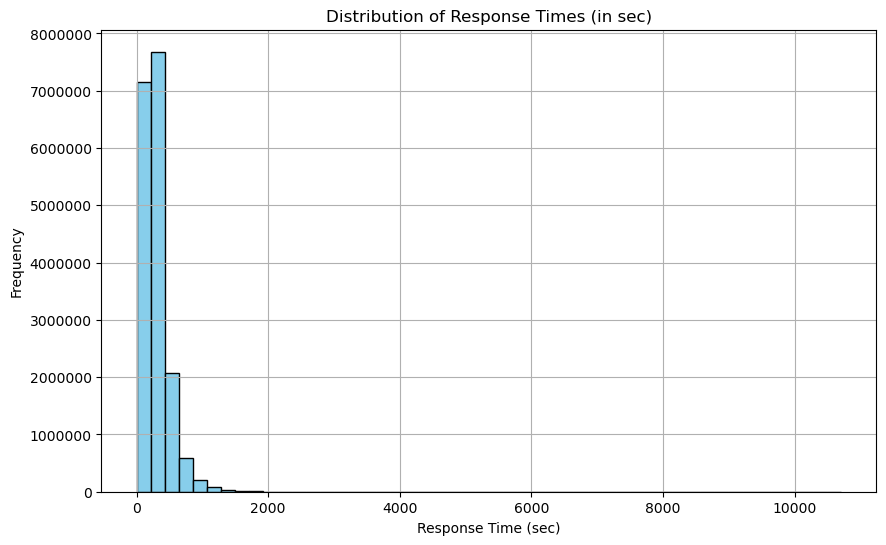

In [12]:
response = trips[trips['request_datetime'] <= trips['pickup_datetime']]
response['response_time'] = (response['pickup_datetime'] - response['request_datetime']).dt.total_seconds()
response_stats = response['response_time'].describe()
print(round(response_stats))
plt.figure(figsize=(10, 6))
response['response_time'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Response Times (in sec)')
plt.xlabel('Response Time (sec)')
plt.ylabel('Frequency')
plt.ticklabel_format(scilimits=(-5, 8))
plt.show()

**Avg response time to pickup under 5 minutes for half of the trips** <br>
**Distribution around zones maybe different or important to consider**

In [13]:
onscene = trips[~trips['on_scene_datetime'].isna()]
onscene = onscene[onscene['on_scene_datetime'] <= onscene['pickup_datetime']]
diff = onscene['pickup_datetime'] - onscene['on_scene_datetime']
diff = diff.dropna()
min_diff = diff.min()
max_diff = diff.max()
avg_diff = diff.mean()
{
    "Minimum Difference": min_diff,
    "Maximum Difference": max_diff,
    "Average Difference": avg_diff
}

{'Minimum Difference': Timedelta('0 days 00:00:00'),
 'Maximum Difference': Timedelta('0 days 03:20:26'),
 'Average Difference': Timedelta('0 days 00:00:59.401524')}

**Both datetime values next to each other, so can be dropped. No significant new information**

In [14]:
#trips['trip_time_min'] = trips['trip_time'] / 60
#trips['trip_time_hour'] = trips['trip_time_min'] / 60
#trips['miles_per_hour'] = trips['trip_miles'] / trips['trip_time_hour']
#avg_mph = trips['miles_per_hour'].mean()
#round(avg_mph,2)
# excluded potential rounding errors

In [15]:
trips = trips[(trips['trip_time'] > 120)]

In [20]:
trips = trips[trips['trip_miles'] > 0.3]

In [24]:
trips = trips[(trips['driver_pay'] > 2.5)]

**Exlucde/Drop extrem values**<br>
**Further investigation of mph is difficult due to the high traffic in NYC**

**Dropping columns that are not objectives of the thesis!**

In [25]:
trips = trips.drop(columns=['dispatching_base_num', 'originating_base_num', 'access_a_ride_flag', 'wav_request_flag', 'wav_match_flag', 'shared_request_flag', 'shared_match_flag'])
trips = trips.drop(columns=['base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay'])
trips = trips.drop(columns=['hvfhs_license_num', 'on_scene_datetime'])

In [26]:
trips.reset_index(drop=True, inplace=True)
trips.info()
trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17962676 entries, 0 to 17962675
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   request_datetime  datetime64[us]
 1   pickup_datetime   datetime64[us]
 2   dropoff_datetime  datetime64[us]
 3   PULocationID      int32         
 4   DOLocationID      int32         
 5   trip_miles        float64       
 6   trip_time         int64         
dtypes: datetime64[us](3), float64(1), int32(2), int64(1)
memory usage: 822.3 MB


,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time
0,2024-09-01 23:50:45,2024-09-02,2024-09-02 00:15:06,17,37,2.71,906
1,2024-09-01 23:54:10,2024-09-02,2024-09-02 00:39:24,132,261,21.37,2364
2,2024-09-01 23:58:45,2024-09-02,2024-09-02 00:10:45,126,208,3.89,645
3,2024-09-01 23:54:54,2024-09-02,2024-09-02 00:27:29,83,262,7.16,1649
4,2024-09-01 23:57:54,2024-09-02,2024-09-02 00:21:48,229,7,4.98,1308


In [27]:
print(trips.head(2).to_latex())
trips.to_parquet('trips09.parquet')

\begin{tabular}{llllrrrr}
\toprule
 & request_datetime & pickup_datetime & dropoff_datetime & PULocationID & DOLocationID & trip_miles & trip_time \\
\midrule
0 & 2024-09-01 23:50:45 & 2024-09-02 00:00:00 & 2024-09-02 00:15:06 & 17 & 37 & 2.710000 & 906 \\
1 & 2024-09-01 23:54:10 & 2024-09-02 00:00:00 & 2024-09-02 00:39:24 & 132 & 261 & 21.370000 & 2364 \\
\bottomrule
\end{tabular}



**Now geo and zone df**

In [28]:
zones.loc[zones['LocationID'] == 265, ['Borough', 'service_zone']] = 'Outside of NYC'

In [29]:
zones.to_csv('zones.csv')

In [30]:
distriZones = zones.groupby('Borough')['Zone'].size().reset_index(name='Zones')
print(distriZones)
distriServiceZones = zones.groupby(['Borough', 'service_zone']).size().reset_index(name='Service_Zones')
print(distriServiceZones)

          Borough  Zones
0           Bronx     43
1        Brooklyn     61
2             EWR      1
3       Manhattan     69
4  Outside of NYC      1
5          Queens     69
6   Staten Island     20
7         Unknown      1
          Borough    service_zone  Service_Zones
0           Bronx       Boro Zone             43
1        Brooklyn       Boro Zone             61
2             EWR             EWR              1
3       Manhattan       Boro Zone             14
4       Manhattan     Yellow Zone             55
5  Outside of NYC  Outside of NYC              1
6          Queens        Airports              2
7          Queens       Boro Zone             67
8   Staten Island       Boro Zone             20


In [31]:
copy = trips
trips_zones = copy.merge(
    zones.rename(columns={
        'LocationID': 'PULocationID',
        'Borough': 'PUBorough',
        'Zone': 'PUZone',
        'service_zone': 'PUservice_zone'
    }),
    on='PULocationID',
    how='left'
)
trips_zones = trips_zones.merge(
    zones.rename(columns={
        'LocationID': 'DOLocationID',
        'Borough': 'DOBorough',
        'Zone': 'DOZone',
        'service_zone': 'DOservice_zone'
    }),
    on='DOLocationID',
    how='left'
)
trips_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17962676 entries, 0 to 17962675
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   request_datetime  datetime64[us]
 1   pickup_datetime   datetime64[us]
 2   dropoff_datetime  datetime64[us]
 3   PULocationID      int32         
 4   DOLocationID      int32         
 5   trip_miles        float64       
 6   trip_time         int64         
 7   PUBorough         object        
 8   PUZone            object        
 9   PUservice_zone    object        
 10  DOBorough         object        
 11  DOZone            object        
 12  DOservice_zone    object        
dtypes: datetime64[us](3), float64(1), int32(2), int64(1), object(6)
memory usage: 1.6+ GB


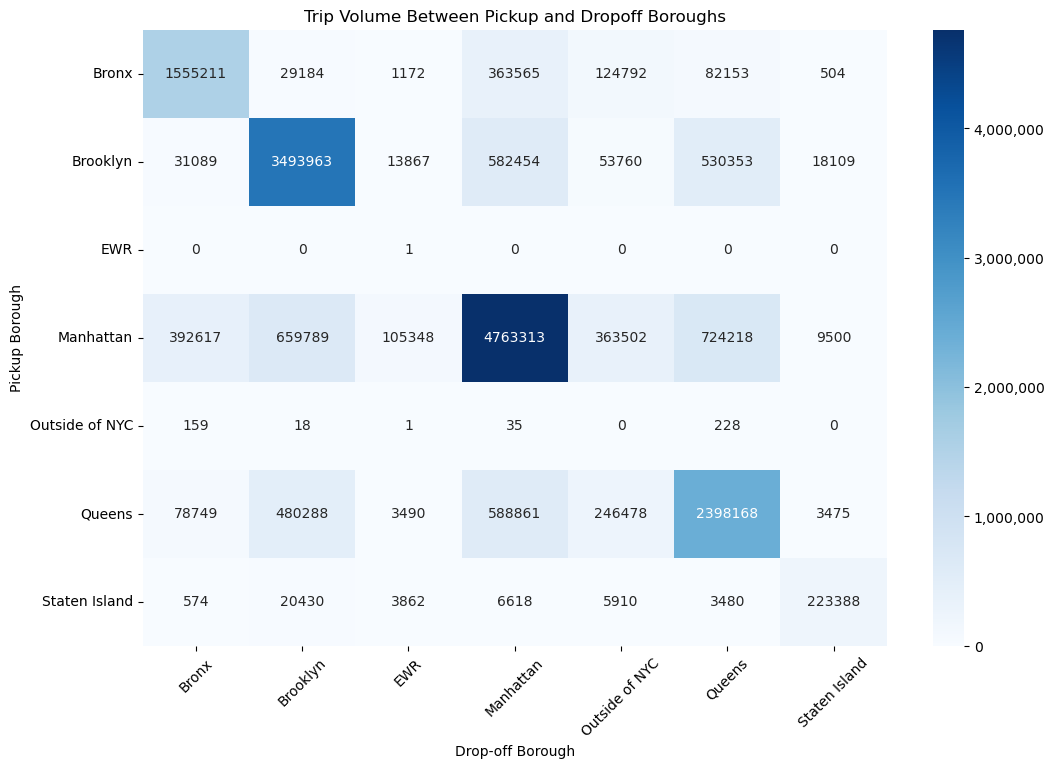

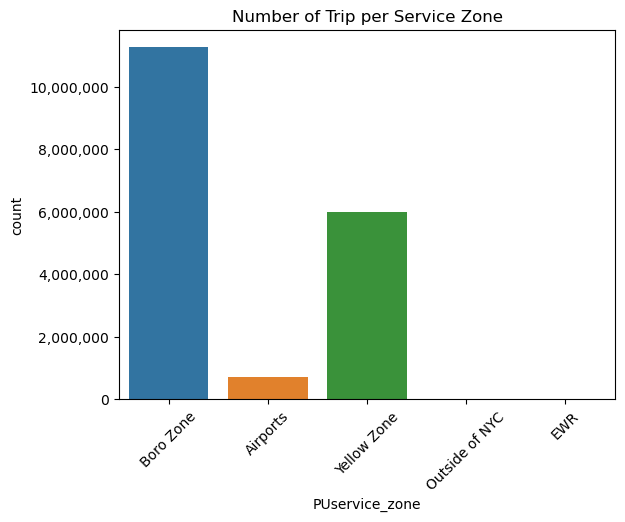

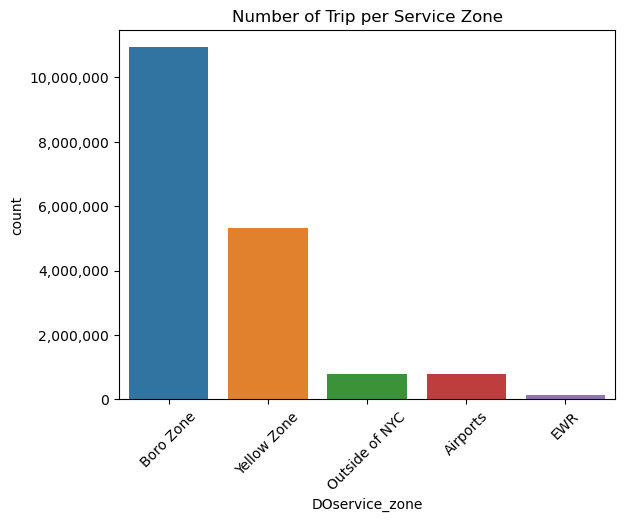

In [33]:
from matplotlib.ticker import StrMethodFormatter

trip_counts = trips_zones.pivot_table(index='PUBorough', columns='DOBorough', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(trip_counts, annot=True, fmt="d", cmap="Blues", cbar=True)
cbar = plt.gca().collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Trip Volume Between Pickup and Dropoff Boroughs')
plt.xlabel('Drop-off Borough')
plt.ylabel('Pickup Borough')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('Trip Volume Between Pickup and Dropoff Boroughs.png', format='png', dpi=1200)
plt.show()
##
sns.countplot(data=trips_zones, x='PUservice_zone')
plt.title('Number of Trip per Service Zone')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()
##
sns.countplot(data=trips_zones, x='DOservice_zone')
plt.title('Number of Trip per Service Zone')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

In [52]:
#!pip install geopandas matplotlib
import geopandas as gpd
# Load the shapefile (GeoPandas automatically detects and uses the associated .shx and .dbf)
geo = gpd.read_file(r"C:\Users\r-cet\OneDrive\Desktop\BA\taxi_zones\taxi_zones.shp")
print(geo.info())
geo.crs

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [53]:
geo = geo.to_crs(epsg=4326)
geo['longitude'] = geo['geometry'].centroid.x 
geo['latitude'] = geo['geometry'].centroid.y 

C:\Users\r-cet\AppData\Local\Temp\ipykernel_5208\2480313019.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['longitude'] = geo['geometry'].centroid.x
C:\Users\r-cet\AppData\Local\Temp\ipykernel_5208\2480313019.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo['latitude'] = geo['geometry'].centroid.y


C:\Users\r-cet\AppData\Local\Temp\ipykernel_5208\2806162006.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(["Boroughs", "Airports"], loc='upper right')


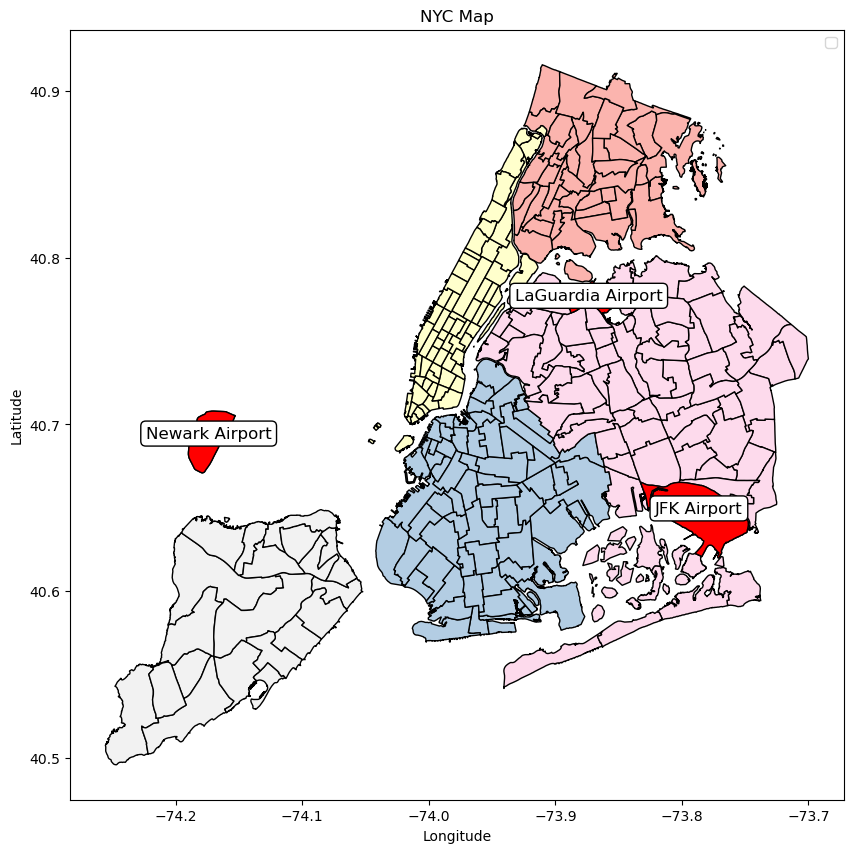

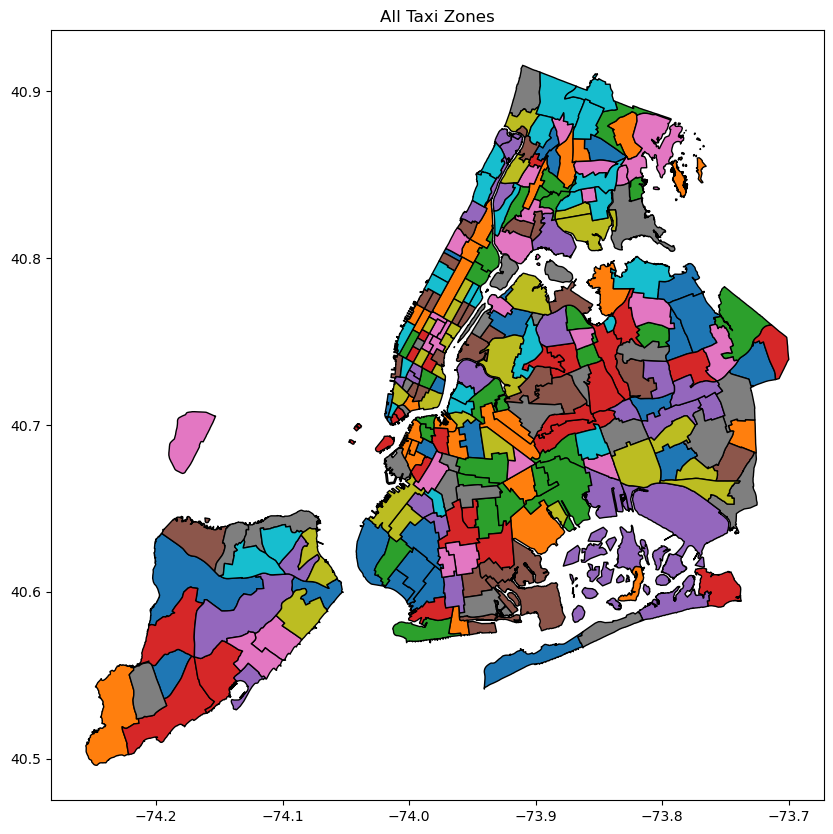

In [54]:
ax = geo.plot(column='borough', figsize=(10, 10), edgecolor='black', legend=True, cmap='Pastel1')
highlight_zones = geo[geo['LocationID'].isin([1, 132, 138])]
highlight_zones.plot(ax=ax, color='red', edgecolor='black', label='Highlighted Zones')

for idx, row in highlight_zones.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['zone'], 
             horizontalalignment='center', fontsize=12, color='black', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.title("NYC Map")
plt.legend(["Boroughs", "Airports"], loc='upper right')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.savefig('NYC_map.png', format='png', dpi=1200)
plt.show()

geo.plot(column='zone', figsize=(10, 10), edgecolor='black')
plt.title("All Taxi Zones")
plt.savefig('expl.pdf', format='pdf', dpi=1200)
plt.show()

In [55]:
expected_values = set(range(1, 266))
actual_values = set(geo['LocationID'])
missing_values = expected_values - actual_values

if missing_values:
    print("Missing values:", missing_values)
else:
    print("All values between 1 and 265 are present.")

Missing values: {104, 265, 105, 264, 57}


In [56]:
pu = trips['PULocationID'].unique()
do = trips['DOLocationID'].unique()
missing_pu_locations = [location for location in expected_values if location not in pu]
missing_do_locations = [location for location in expected_values if location not in do]
print(f"Missing PU locations (no trips): {len(missing_pu_locations)}")
print(f"Missing DO locations (no trips): {len(missing_do_locations)}")
print("Missing PU locations:", missing_pu_locations)
print("Missing DO locations:", missing_do_locations)

Missing PU locations (no trips): 3
Missing DO locations (no trips): 3
Missing PU locations: [103, 104, 264]
Missing DO locations: [103, 199, 264]


In [57]:
geo[geo['LocationID'].isin({103,56})]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,longitude,latitude
55,56,0.056848,0.000181,Corona,56,Queens,"POLYGON ((-73.85361 40.7475, -73.85325 40.7468...",-73.858845,40.741407
56,57,0.019271,0.000018,Corona,56,Queens,"POLYGON ((-73.85131 40.74984, -73.85443 40.748...",-73.853582,40.751819
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((-74.04389 40.69018, -74.04351 40.689...",-74.045288,40.689860
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((-74.03995 40.70089, -74.03945 40.700...",-74.040771,40.698769
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((-74.01675 40.69334, -74.0154 40.6930...",-74.019073,40.688784


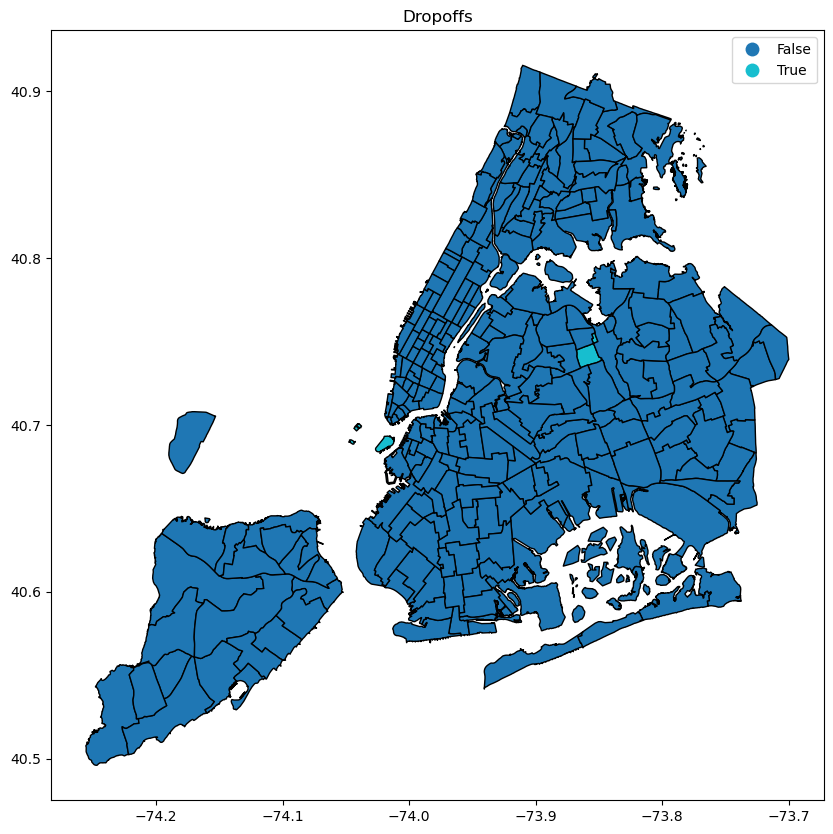

In [58]:
geo.plot(
    column=geo['LocationID'].isin({103,56}), 
    figsize=(10, 10), 
    edgecolor='black', 
    legend=True
)
plt.title("Dropoffs")
plt.show()

In [59]:
geo.loc[geo['OBJECTID'] == 57, 'LocationID'] = 57
geo.loc[geo['OBJECTID'] == 104, 'LocationID'] = 104
geo.loc[geo['OBJECTID'] == 105, 'LocationID'] = 105
geo[geo['LocationID'].isin({103,56,57,104,105})]

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,longitude,latitude
55,56,0.056848,0.000181,Corona,56,Queens,"POLYGON ((-73.85361 40.7475, -73.85325 40.7468...",-73.858845,40.741407
56,57,0.019271,0.000018,Corona,57,Queens,"POLYGON ((-73.85131 40.74984, -73.85443 40.748...",-73.853582,40.751819
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((-74.04389 40.69018, -74.04351 40.689...",-74.045288,40.689860
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,104,Manhattan,"POLYGON ((-74.03995 40.70089, -74.03945 40.700...",-74.040771,40.698769
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,105,Manhattan,"POLYGON ((-74.01675 40.69334, -74.0154 40.6930...",-74.019073,40.688784


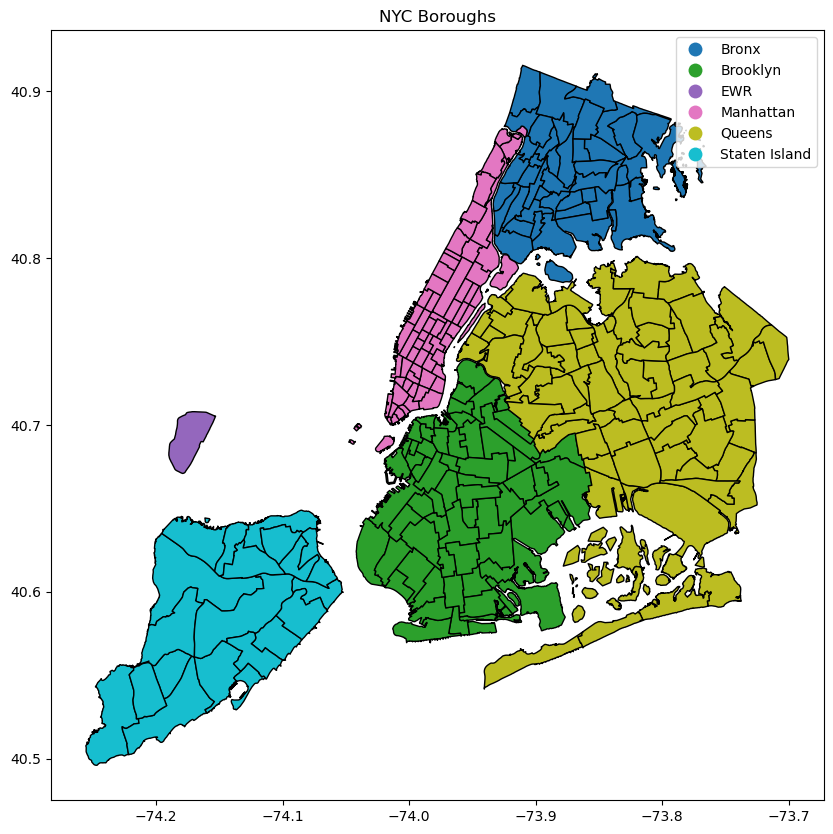

In [60]:
geo.plot(column='borough', figsize=(10, 10), edgecolor='black', legend=True)
plt.title("NYC Boroughs")
plt.savefig('NYC_Boroughs.png', format='png', dpi=1200)
plt.show()

In [61]:
geo.to_file('geo.shp')

In [62]:
cs = pd.read_csv(r"NYC_EV_Fleet_Station_Network.csv")
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   AGENCY                                     1442 non-null   object 
 1   STATION NAME                               1442 non-null   object 
 2   TYPE OF CHARGER                            1442 non-null   object 
 3   NO. OF PLUGS                               1442 non-null   int64  
 4   ADDRESS                                    1431 non-null   object 
 5   CITY                                       1431 non-null   object 
 6   POSTCODE                                   1431 non-null   float64
 7   BOROUGH                                    1431 non-null   object 
 8   PUBLIC CHARGER?                            73 non-null     object 
 9   FEE FOR CITY DRIVERS                       71 non-null     object 
 10  LATITUDE                

In [63]:
print(cs['TYPE OF CHARGER'].value_counts())
print(cs['NO. OF PLUGS'].value_counts())
print(cs['CITY'].value_counts())
print(cs['BOROUGH'].value_counts())
print(cs['PUBLIC CHARGER?'].value_counts())

TYPE OF CHARGER
Level 2 Charger                  886
Level 3 Fast Charger             335
EV Solar Arc Charger             155
L2 DOT Flo Curbside Charger       39
Mobile Charger                    11
DOT Municipal Level 2 Charger      7
EV Solar Canopy Charger            6
DOT Municipal Level 3 Charger      3
Name: count, dtype: int64
NO. OF PLUGS
1     810
2     605
4      15
6       4
3       3
5       2
9       2
31      1
Name: count, dtype: int64
CITY
New York            304
Brooklyn            212
Queens              206
Staten Island        93
Bronx                83
                   ... 
Brooklyn Heights      1
Williamsburg          1
Tottenville           1
Woodhaven             1
Elmhurst              1
Name: count, Length: 101, dtype: int64
BOROUGH
Queens           467
Manhattan        305
Brooklyn         292
Bronx            181
Staten Island    125
Upstate           61
Name: count, dtype: int64
PUBLIC CHARGER?
Yes                            45
NYC DC Fast Public Chargi

In [64]:
print(cs['CITY'].unique())
print(cs['BOROUGH'].unique())

['East New York' 'Brooklyn' 'Staten Island' 'New York' 'Queens'
 'Southside' 'Jamaica' 'Middle Village' 'Downtown Brooklyn'
 'Long Island City' 'Starrett City' 'Bronx' 'Bedford-Stuyvesant'
 'Valhalla' 'East Bronx' 'Arkville' 'Olivebridge' 'Wappingers Falls'
 'Walton' 'Astoria' 'The Bronx' 'Gardiner' 'Yorktown Heights' 'Ossining'
 'Katonah' 'Gilboa' 'Grahamsville' 'Neversink' 'East Williamsburg'
 'Grand Gorge' 'Yonkers' 'West Bronx' 'Kingston' 'Flushing' 'Corona'
 'Margaretville' 'Greenpoint' 'Port Jervis' 'Bergen Beach' 'Carmel Hamlet'
 'Tannersville' 'Deposit' 'Sheepshead Bay' 'Downsville' 'Maspeth'
 'Westchester' 'Manhattan' 'East Elmhurst' "Riker's Island" 'Kew Gardens'
 'Elmhurst' 'Todt Hill' 'Greenwood' 'Bayside' 'Mid Island' 'LIC' 'Belmont'
 'Fordham Heights' 'Canarsie' 'Glendale' 'Fort Totten' 'Midland Beach'
 'Castleton Corners' 'North Riverdale' 'Annadale' 'Brooklyn Heights'
 'Williamsburg' 'Pelham Bay' 'Gravesend' 'Tottenville' 'Fresh Meadows'
 'Tompkinsville' 'Woodhaven' 'So

In [65]:
cs = cs[['STATION NAME', 'TYPE OF CHARGER', 'NO. OF PLUGS', 'BOROUGH', 'PUBLIC CHARGER?', 'LATITUDE', 'LONGITUDE']]
cs.info()
cs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION NAME     1442 non-null   object 
 1   TYPE OF CHARGER  1442 non-null   object 
 2   NO. OF PLUGS     1442 non-null   int64  
 3   BOROUGH          1431 non-null   object 
 4   PUBLIC CHARGER?  73 non-null     object 
 5   LATITUDE         1152 non-null   float64
 6   LONGITUDE        1152 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 79.0+ KB


0

In [66]:
cs = cs.dropna(subset=['LATITUDE', 'LONGITUDE']).reset_index(drop=True)

In [67]:
from shapely.geometry import Point

cs['geometry'] = cs.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
cs_geo = gpd.GeoDataFrame(cs, geometry='geometry')
cs_geo.set_crs('EPSG:4326', allow_override=True, inplace=True)
cs_geo

,STATION NAME,TYPE OF CHARGER,NO. OF PLUGS,BOROUGH,PUBLIC CHARGER?,LATITUDE,LONGITUDE,geometry
0,NYC FLEET / ACS_LINDEN_1_L3,Level 3 Fast Charger,1,Brooklyn,NaN,40.668034,-73.869949,POINT (-73.86995 40.66803)
1,NYC FLEET / ACS_LINDEN_2_L3,Level 3 Fast Charger,1,Brooklyn,NaN,40.668034,-73.869949,POINT (-73.86995 40.66803)
2,NYC FLEET / ACS_LINDEN-1,Level 2 Charger,1,Brooklyn,NaN,40.668034,-73.869949,POINT (-73.86995 40.66803)
3,NYC FLEET / ACSSTMARKSPL1,Level 2 Charger,1,Staten Island,NaN,40.640708,-74.077697,POINT (-74.0777 40.64071)
4,NYC FLEET / CITYHALL EAST,Level 2 Charger,2,Manhattan,NaN,40.712806,-74.006096,POINT (-74.0061 40.71281)
...,...,...,...,...,...,...,...,...
1147,DSNY_ENPHASE_Q05A-7,Level 2 Charger,1,Queens,NaN,40.720249,-73.922845,POINT (-73.92284 40.72025)
1148,NYCEM LC,Level 2 Charger,4,Brooklyn,NaN,40.702555,-73.934382,POINT (-73.93438 40.70256)
1149,NYCEM_FRESHKILLS_FORDPRO,Level 2 Charger,1,Staten Island,NaN,40.575374,-74.196743,POINT (-74.19674 40.57537)
1150,QPLCENTRAL_FORDPRO,Level 2 Charger,1,Queens,NaN,40.707865,-73.795295,POINT (-73.7953 40.70786)


In [68]:
cs = cs.drop(columns=['geometry'])

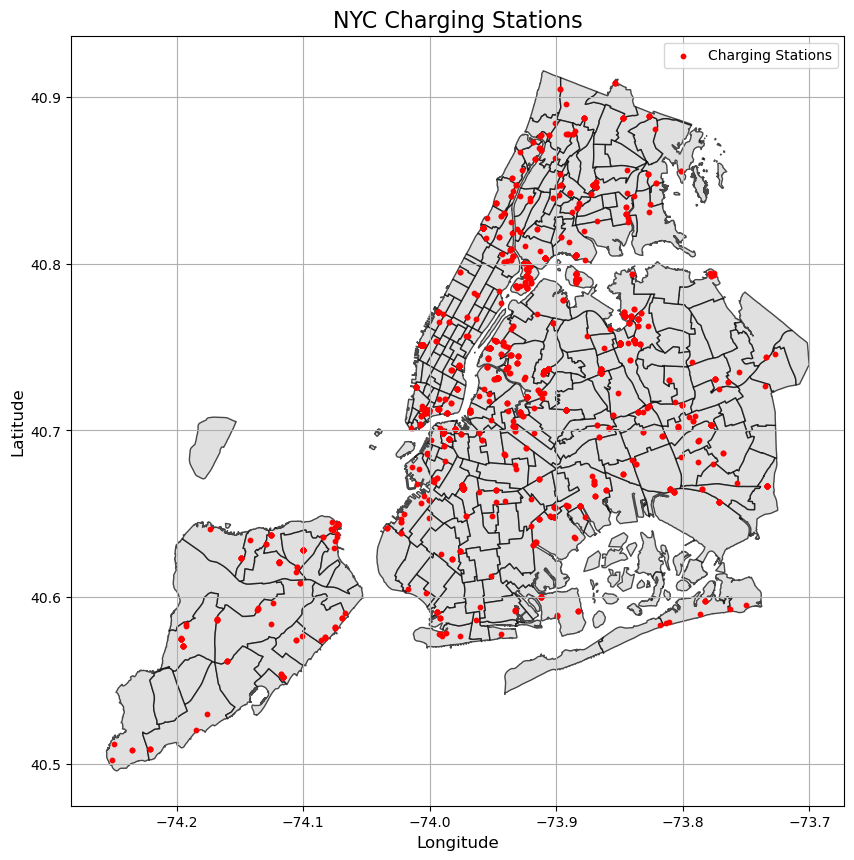

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
geo.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.7)
cs_geo.plot(ax=ax, color='red', markersize=10, label='Charging Stations')
plt.title('NYC Charging Stations', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('NYC_CS.png', format='png', dpi=1200)
plt.show()

In [80]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION NAME     1152 non-null   object 
 1   TYPE OF CHARGER  1152 non-null   object 
 2   NO. OF PLUGS     1152 non-null   int64  
 3   BOROUGH          1152 non-null   object 
 4   PUBLIC CHARGER?  24 non-null     object 
 5   LATITUDE         1152 non-null   float64
 6   LONGITUDE        1152 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 63.1+ KB


In [81]:
cs_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   STATION NAME     1152 non-null   object  
 1   TYPE OF CHARGER  1152 non-null   object  
 2   NO. OF PLUGS     1152 non-null   int64   
 3   BOROUGH          1152 non-null   object  
 4   PUBLIC CHARGER?  24 non-null     object  
 5   LATITUDE         1152 non-null   float64 
 6   LONGITUDE        1152 non-null   float64 
 7   geometry         1152 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 72.1+ KB


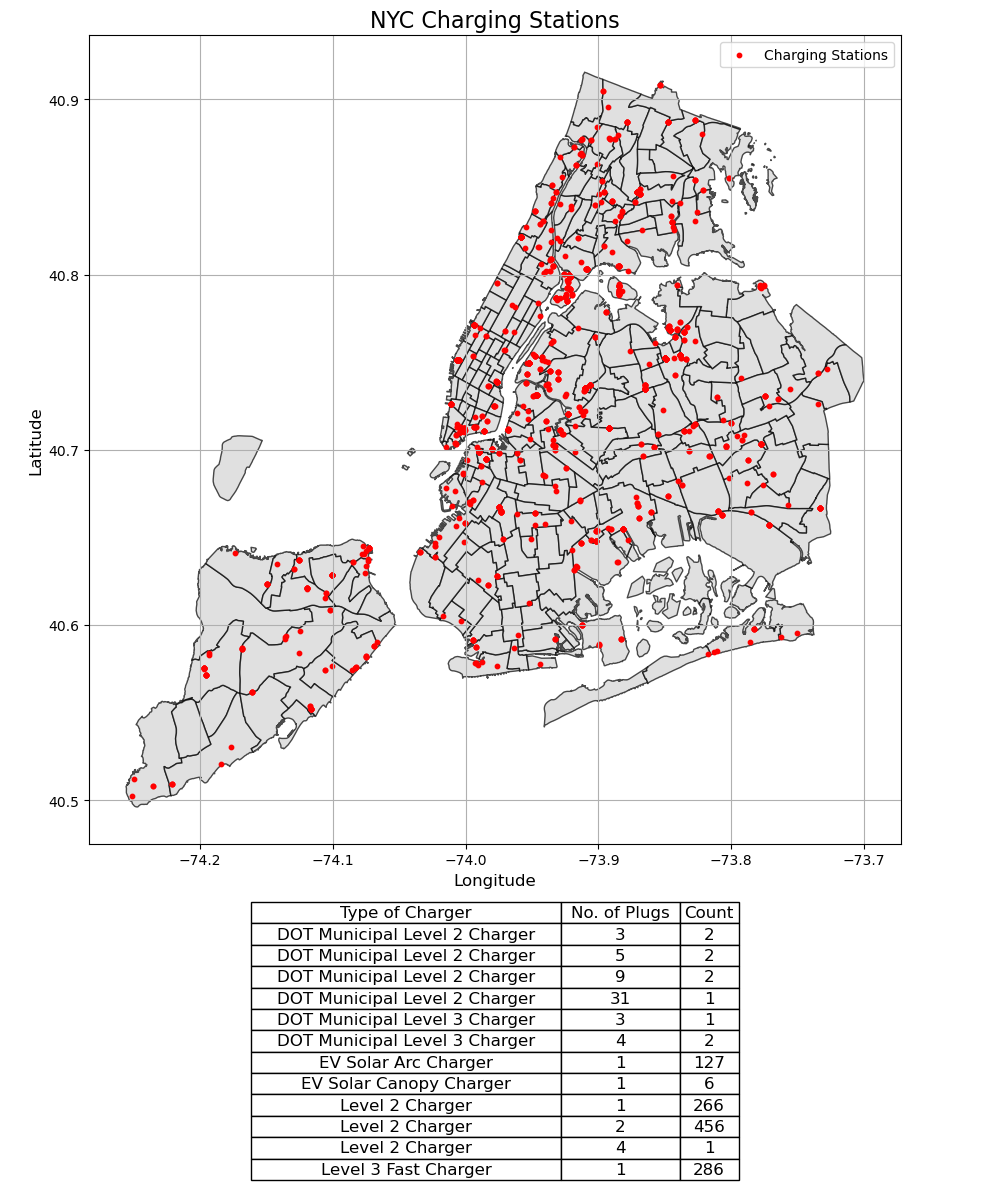

In [82]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 12), gridspec_kw={'height_ratios': [3, 1]})

geo.plot(ax=ax[0], color='lightgrey', edgecolor='black', alpha=0.7)
cs_geo.plot(ax=ax[0], color='red', markersize=10, label='Charging Stations')

ax[0].set_title('NYC Charging Stations', fontsize=16)
ax[0].set_xlabel('Longitude', fontsize=12)
ax[0].set_ylabel('Latitude', fontsize=12)
ax[0].grid(True)
ax[0].legend()

charger_summary = cs_geo.groupby(['TYPE OF CHARGER', 'NO. OF PLUGS']).size().reset_index(name='Count')

# Hide the second subplot's axis
ax[1].axis('off')

# Create a table with readable text size
table = ax[1].table(cellText=charger_summary.values, 
                     colLabels=['Type of Charger', 'No. of Plugs', 'Count'], 
                     loc='center', 
                     cellLoc='center', 
                     colLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width([0, 1, 2])  # Adjust column width

# Show the figure
plt.tight_layout()
plt.show()


In [83]:
print(charger_summary.to_latex())
charger_summary

\begin{tabular}{llrr}
\toprule
 & TYPE OF CHARGER & NO. OF PLUGS & Count \\
\midrule
0 & DOT Municipal Level 2 Charger & 3 & 2 \\
1 & DOT Municipal Level 2 Charger & 5 & 2 \\
2 & DOT Municipal Level 2 Charger & 9 & 2 \\
3 & DOT Municipal Level 2 Charger & 31 & 1 \\
4 & DOT Municipal Level 3 Charger & 3 & 1 \\
5 & DOT Municipal Level 3 Charger & 4 & 2 \\
6 & EV Solar Arc Charger & 1 & 127 \\
7 & EV Solar Canopy Charger & 1 & 6 \\
8 & Level 2 Charger & 1 & 266 \\
9 & Level 2 Charger & 2 & 456 \\
10 & Level 2 Charger & 4 & 1 \\
11 & Level 3 Fast Charger & 1 & 286 \\
\bottomrule
\end{tabular}



,TYPE OF CHARGER,NO. OF PLUGS,Count
0,DOT Municipal Level 2 Charger,3,2
1,DOT Municipal Level 2 Charger,5,2
2,DOT Municipal Level 2 Charger,9,2
3,DOT Municipal Level 2 Charger,31,1
4,DOT Municipal Level 3 Charger,3,1
5,DOT Municipal Level 3 Charger,4,2
6,EV Solar Arc Charger,1,127
7,EV Solar Canopy Charger,1,6
8,Level 2 Charger,1,266
9,Level 2 Charger,2,456


In [84]:
cs_geo.to_file("cs_geo.shp")
cs.to_csv('cs.csv')

C:\Users\r-cet\AppData\Local\Temp\ipykernel_5208\4220126996.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cs_geo.to_file("cs_geo.shp")
C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'STATION NAME' to 'STATION NA'
  ogr_write(
C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'TYPE OF CHARGER' to 'TYPE OF CH'
  ogr_write(
C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'NO. OF PLUGS' to 'NO. OF PLU'
  ogr_write(
C:\Users\r-cet\anaconda3\envs\DSML_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'PUBLIC CHARGER?' to 'PUBLIC CHA'
  ogr_write(


**First try clustering**

In [85]:
coords = np.radians(cs_geo[['LATITUDE', 'LONGITUDE']])

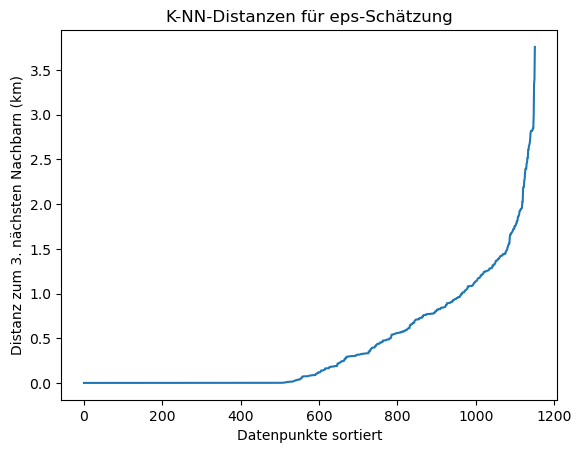

In [94]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5, metric="haversine").fit(coords)
distances, _ = neighbors.kneighbors(coords)

# Sortiere die Abstände der 5 nächsten Nachbarn
distances = np.sort(distances[:,4])

# Plot der k-NN-Distanzen, um eine Elbow-Stelle zu finden
plt.plot(distances * 6371.0088) # km Umwandlung
plt.xlabel("Datenpunkte sortiert")
plt.ylabel("Distanz zum 3. nächsten Nachbarn (km)")
plt.title("K-NN-Distanzen für eps-Schätzung")
plt.show()

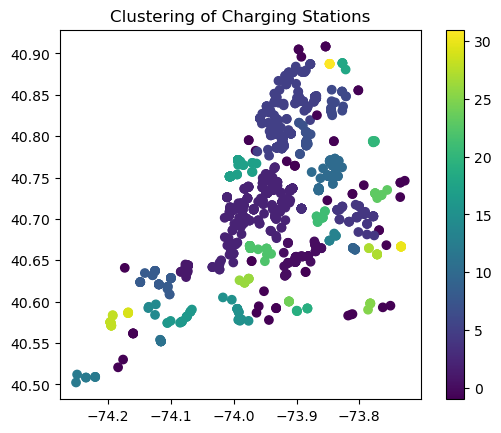

Number of noise points: 52
Number of clusters: 32
Cluster sizes: cluster
 2     331
 5     201
 10    112
 0      54
-1      52
 7      46
 17     41
 4      40
 8      33
 22     27
 6      18
 1      16
 28     16
 16     16
 15     16
 3      14
 9      10
 23      9
 11      9
 21      9
 26      8
 30      8
 20      8
 27      8
 12      7
 31      6
 13      6
 19      6
 25      5
 24      5
 29      5
 18      5
 14      5
Name: count, dtype: int64
Silhouette Score: 0.28073964467940893


In [99]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5/6371.0088, min_samples=5, metric='haversine').fit(coords)
cs_geo['cluster'] = db.labels_
cs_geo.plot(column='cluster', cmap='viridis', legend=True)
plt.title("Clustering of Charging Stations")
plt.show()
noise_points = cs_geo[cs_geo['cluster'] == -1]
print("Number of noise points:", len(noise_points))
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Cluster sizes:", cs_geo['cluster'].value_counts())
from sklearn.metrics import silhouette_score
valid_labels = cs_geo[cs_geo['cluster'] != -1]['cluster']
valid_coords = coords[cs_geo['cluster'] != -1]
score = silhouette_score(valid_coords, valid_labels, metric='haversine')
print("Silhouette Score:", score)  # Wert zwischen -1 und 1 (je höher, desto besser)

**Second try with 2km instead 1.5km**

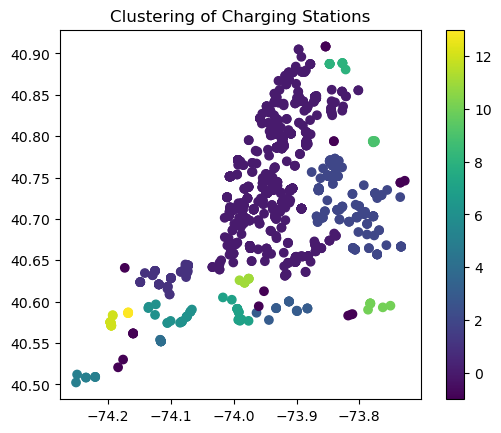

Number of noise points: 20
Number of clusters: 14
Cluster sizes: cluster
 0     755
 2     204
 1      49
 6      21
-1      20
 3      16
 7      16
 12     16
 8      11
 4       9
 9       8
 11      8
 5       7
 10      7
 13      5
Name: count, dtype: int64
Silhouette Score: 0.12724961153739114


In [100]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2/6371.0088, min_samples=5, metric='haversine').fit(coords)
cs_geo['cluster'] = db.labels_
cs_geo.plot(column='cluster', cmap='viridis', legend=True)
plt.title("Clustering of Charging Stations")
plt.show()
noise_points = cs_geo[cs_geo['cluster'] == -1]
print("Number of noise points:", len(noise_points))
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Cluster sizes:", cs_geo['cluster'].value_counts())
from sklearn.metrics import silhouette_score
valid_labels = cs_geo[cs_geo['cluster'] != -1]['cluster']
valid_coords = coords[cs_geo['cluster'] != -1]
score = silhouette_score(valid_coords, valid_labels, metric='haversine')
print("Silhouette Score:", score)  # Wert zwischen -1 und 1 (je höher, desto besser)

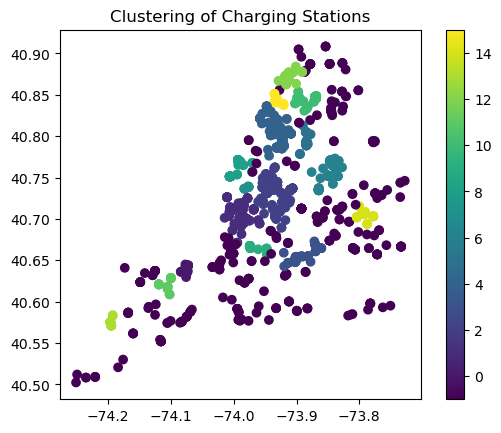

Number of noise points: 316
Number of clusters: 16
Cluster sizes: cluster
-1     316
 2     176
 4     122
 1     117
 6     112
 3      46
 5      44
 8      39
 10     37
 9      25
 14     22
 12     21
 11     20
 0      16
 13     16
 7      13
 15     10
Name: count, dtype: int64
Silhouette Score: 0.5013062996643847


In [106]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5/6371.0088, min_samples=15, metric='haversine').fit(coords)
cs_geo['cluster'] = db.labels_
cs_geo.plot(column='cluster', cmap='viridis', legend=True)
plt.title("Clustering of Charging Stations")
plt.show()
noise_points = cs_geo[cs_geo['cluster'] == -1]
print("Number of noise points:", len(noise_points))
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Cluster sizes:", cs_geo['cluster'].value_counts())
from sklearn.metrics import silhouette_score
valid_labels = cs_geo[cs_geo['cluster'] != -1]['cluster']
valid_coords = coords[cs_geo['cluster'] != -1]
score = silhouette_score(valid_coords, valid_labels, metric='haversine')
print("Silhouette Score:", score)  # Wert zwischen -1 und 1 (je höher, desto besser)

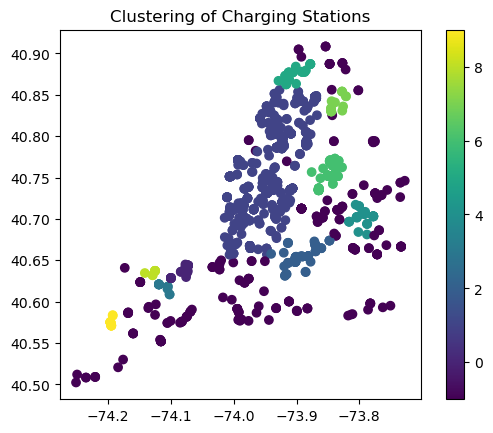

Number of noise points: 238
Number of clusters: 10
Cluster sizes: cluster
 1    609
-1    238
 6    112
 2     60
 5     29
 4     28
 0     24
 7     16
 9     16
 3     12
 8      8
Name: count, dtype: int64
Silhouette Score: 0.23931670001982092


In [113]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.75/6371.0088, min_samples=15, metric='haversine').fit(coords)
cs_geo['cluster'] = db.labels_
cs_geo.plot(column='cluster', cmap='viridis', legend=True)
plt.title("Clustering of Charging Stations")
plt.show()
noise_points = cs_geo[cs_geo['cluster'] == -1]
print("Number of noise points:", len(noise_points))
num_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Cluster sizes:", cs_geo['cluster'].value_counts())
from sklearn.metrics import silhouette_score
valid_labels = cs_geo[cs_geo['cluster'] != -1]['cluster']
valid_coords = coords[cs_geo['cluster'] != -1]
score = silhouette_score(valid_coords, valid_labels, metric='haversine')
print("Silhouette Score:", score)  # Wert zwischen -1 und 1 (je höher, desto besser)